In [32]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import img_as_float
from scipy.ndimage import convolve

In [22]:
def get_log_kernel(sigma:float) -> np.ndarray:
    """
    Returns a Laplacian of the Gaussian kernel for the given sigma
    
    Parameters
    ----------
    sigma : float
        Standard deviation of the Gaussian filter
        
    Returns
    -------
    np.ndarray
        Laplacian of the Gaussian kernel
    """
    
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    x = np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1)
    y = np.arange(-kernel_size // 2 + 1, kernel_size // 2 + 1)
    xx, yy = np.meshgrid(x, y)
            
    return (xx**2 + yy**2 - 2 * sigma**2) / sigma**4 * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

kernels = {f"LoG_sigma_{sigma}": get_log_kernel(sigma) for sigma in np.arange(1, 10.5, 0.5)}

In [23]:
# Save kernels to file
np.savez('static/log_kernels.npz', **kernels)

In [21]:
log_kernels = np.load('static/log_kernels.npz')
print(log_kernels["LoG_sigma_1.0"])

[[ 1.97455687e-03  1.65378311e-02  5.39035760e-02  7.77629758e-02
   5.39035760e-02  1.65378311e-02  1.97455687e-03]
 [ 1.65378311e-02  1.09893833e-01  2.46254996e-01  2.70670566e-01
   2.46254996e-01  1.09893833e-01  1.65378311e-02]
 [ 5.39035760e-02  2.46254996e-01  0.00000000e+00 -6.06530660e-01
   0.00000000e+00  2.46254996e-01  5.39035760e-02]
 [ 7.77629758e-02  2.70670566e-01 -6.06530660e-01 -2.00000000e+00
  -6.06530660e-01  2.70670566e-01  7.77629758e-02]
 [ 5.39035760e-02  2.46254996e-01  0.00000000e+00 -6.06530660e-01
   0.00000000e+00  2.46254996e-01  5.39035760e-02]
 [ 1.65378311e-02  1.09893833e-01  2.46254996e-01  2.70670566e-01
   2.46254996e-01  1.09893833e-01  1.65378311e-02]
 [ 1.97455687e-03  1.65378311e-02  5.39035760e-02  7.77629758e-02
   5.39035760e-02  1.65378311e-02  1.97455687e-03]]


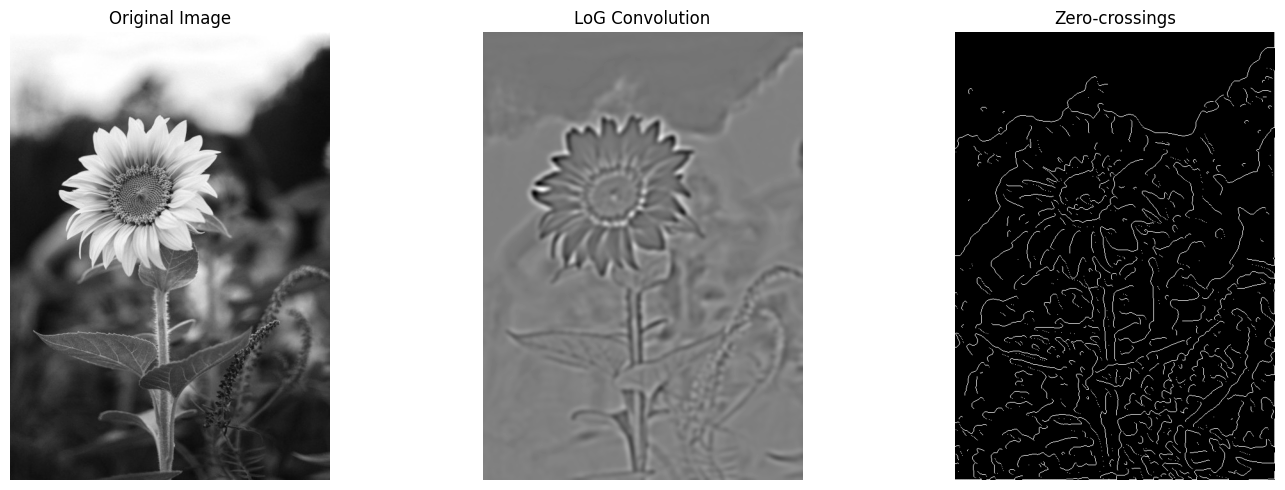

In [34]:
img = img_as_float(imread("static/sunflower.jpg"))

kernel = log_kernels["LoG_sigma_4.0"]
img_convol = convolve(img, kernel)

lap_sign = np.sign(img_convol)

# Zero-pad the last row and column
# The pad_width parameter is the number of pixels to pad 
# on each side (before and after for each dimension)
lap_sign = np.pad(lap_sign, pad_width=((0, 1), (0, 1)), mode='constant')

# Check if neighbor pixels have opposite sign
diff_x = (lap_sign[:-1, :-1] - lap_sign[:-1, 1:] < 0)
diff_y = lap_sign[:-1, :-1] - lap_sign[1:, :-1] < 0

# If either of the above is true, the pixel is a zero-crossing
edges =  np.logical_or(diff_x, diff_y).astype(float)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(img_convol, cmap='gray')
ax[1].set_title('LoG Convolution')
ax[1].axis('off')

ax[2].imshow(edges, cmap='gray')
ax[2].set_title('Zero-crossings')
ax[2].axis('off')

plt.tight_layout()


In [30]:
img_convol

array([[189, 189, 189, ..., 123, 123, 123],
       [189, 189, 189, ..., 128, 128, 128],
       [190, 191, 191, ..., 138, 138, 138],
       ...,
       [  0, 255, 255, ..., 241, 242, 243],
       [  0,   0, 255, ..., 255,   0,   0],
       [  0,   0, 255, ...,   5,   6,   7]], dtype=uint8)